<a href="https://colab.research.google.com/github/WelfLowe/ML4developers/blob/main/0%E2%80%93Sklearn-Tensorflow-PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification on the Iris datasets using Sklearn

Import necessary libraries.

In [219]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import tqdm

## 1. Collect the data

Someone has collected the Iris data for us, so we just need to load this dataset and convert it into a $\verb|numpy|$ array.

In [220]:
iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)
print(iris.feature_names)
print(iris.target_names)
X, y = iris.data, iris.target

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## 2. Prepare the data

Split the data in training and test set

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standardize the features

In [222]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Set/tune the model

We just select a Support Vector Classifier from the library.


In [223]:
clf = SVC()

## 4. Train the model

We just call one function

In [224]:
clf.fit(X_train, y_train)

SVC()

## 5. Evaluate the model

Predict on the test set


In [225]:
y_pred = clf.predict(X_test)

Evaluate the model's accuracy

In [226]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


Compute and show the confusion matrix

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


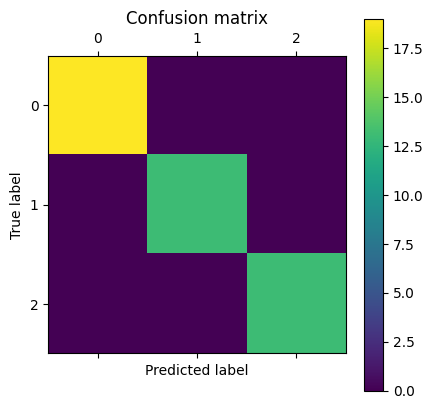

In [227]:
def ComputeConfusionMatrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print(cm)

  # Show confusion matrix in a separate window
  plt.matshow(cm)
  plt.title('Confusion matrix')
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

ComputeConfusionMatrix(y_test, y_pred)


# Same using Tensorflow

Import the libraries. Then continue with step 2.

In [228]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

## 2. Prepare the data

"One-hot" encoding.

In [229]:
y_train_tf = tf.one_hot(y_train, 3)
y_test_tf = tf.one_hot(y_test, 3)

## 3. Set/tune the model

In [230]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

Compile the model and define the optimization algorithm.

In [231]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 4. Train the model

In [232]:
EPOCHS=100
history = model.fit(X_train, y_train_tf, batch_size=50, epochs=EPOCHS, validation_data=(X_test, y_test_tf))

Epoch 1/100
3/3 [==============================] - 1s 152ms/step - loss: 1.0468 - accuracy: 0.5238 - val_loss: 1.0259 - val_accuracy: 0.4444
Epoch 2/100
3/3 [==============================] - 0s 34ms/step - loss: 0.9640 - accuracy: 0.5333 - val_loss: 0.9393 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 0.8934 - accuracy: 0.6571 - val_loss: 0.8593 - val_accuracy: 0.8222
Epoch 4/100
3/3 [==============================] - 0s 36ms/step - loss: 0.8277 - accuracy: 0.8000 - val_loss: 0.7888 - val_accuracy: 0.8444
Epoch 5/100
3/3 [==============================] - 0s 35ms/step - loss: 0.7700 - accuracy: 0.8381 - val_loss: 0.7279 - val_accuracy: 0.8444
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 0.7167 - accuracy: 0.8381 - val_loss: 0.6752 - val_accuracy: 0.8444
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6694 - accuracy: 0.8286 - val_loss: 0.6294 - val_accuracy: 0.8444
Epoch 8/100
3/3 [==

## 5. Evaluate the model

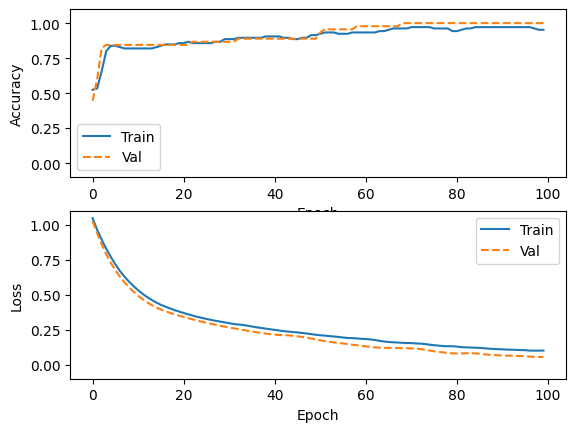

In [233]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
    metrics =  ['accuracy','loss',]
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,1,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+ metric], color=colors[1], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        plt.ylim([-0.1,1.1])
        plt.legend()

plot_metrics(history)

In [234]:
loss, accuracy = model.evaluate(X_test, y_test_tf, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Test loss: 0.05483091250061989
Test accuracy: 1.0


In [235]:
y_pred_tf = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [236]:
y_pred = np.argmax(y_pred_tf,axis=1)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


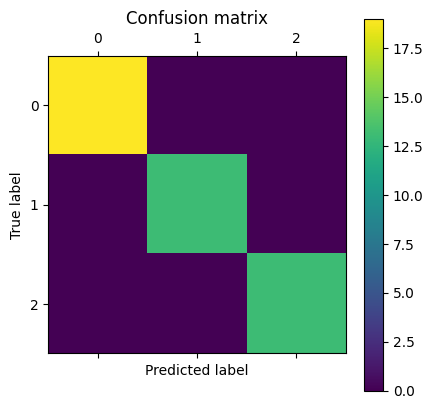

In [237]:
ComputeConfusionMatrix(y_test, y_pred)

# Same using PyTorch

Import the libraries. Then continue with step 3.


In [238]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

## 3. Set/tune the model

In [239]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [240]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model


Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

## 4. Train the model

In [241]:
EPOCHS  = 150
X_train_py = Variable(torch.from_numpy(X_train)).float()
y_train_py = Variable(torch.from_numpy(y_train)).long()
X_test_py  = Variable(torch.from_numpy(X_test)).float()
y_test_py  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred_py = model(X_train_py)
    loss = loss_fn(y_pred_py, y_train_py)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred_py = model(X_test_py)
        correct = (torch.argmax(y_pred_py, dim=1) == y_test_py).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 150/150 [00:00<00:00, 422.05it/s]


## 5. Evaluate the model

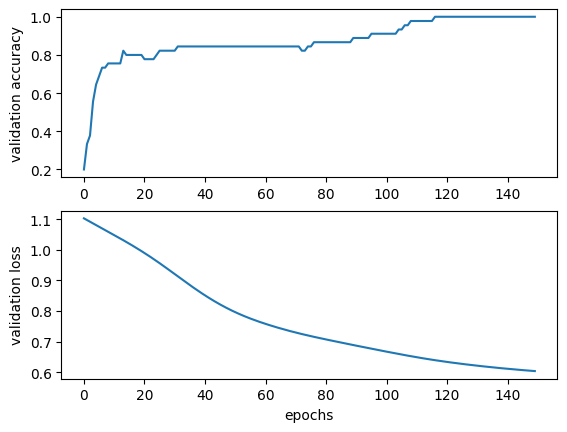

In [242]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

Accuracy: 1.00
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


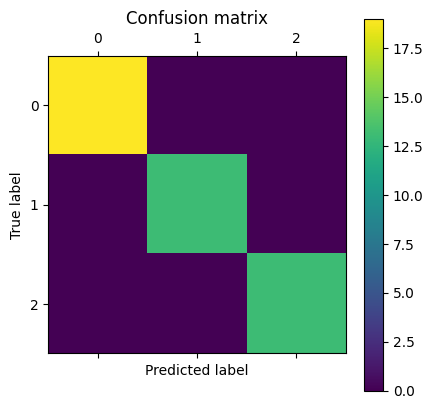

In [243]:
y_pred_py = model(X_test_py)
y_test_np = y_test_py.detach().numpy()
y_pred_np = (torch.argmax(y_pred_py, dim=1)).detach().numpy()

accuracy = accuracy_score(y_test_np, y_pred_np)
print(f"Accuracy: {accuracy:.2f}")

ComputeConfusionMatrix(y_test_np, y_pred_np)
